# Rainfall Weather Forecasting

**Project Description**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation\
Location  -The common name of the location of the weather station\
MinTemp  -The minimum temperature in degrees celsius\
MaxTemp -The maximum temperature in degrees celsius\
Rainfall  -The amount of rainfall recorded for the day in mm\
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am\
Sunshine  -The number of hours of bright sunshine in the day.\
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight\
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight\
WindDir9am -Direction of the wind at 9am\
WindDir3pm -Direction of the wind at 3pm\
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am\
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm\
Humidity9am -Humidity (percent) at 9am\
Humidity3pm -Humidity (percent) at 3pm\
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am\
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm\
Cloud9am - Fraction of sky obscured by cloud at 9am. \
Cloud3pm -Fraction of sky obscured by cloud \
Temp9am-Temperature (degrees C) at 9am\
Temp3pm -Temperature (degrees C) at 3pm\
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0\
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


**1. Importing all required libraries**

In [954]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

**2. Reading data from csv file and imorted into Jupyter notebook for further evaluation**

In [955]:
data = pd.read_csv('Rainfall.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [956]:
# Dataframe

In [957]:
df = pd.DataFrame(data)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [958]:
# Checking number of columns and rows

In [959]:
df.shape

(8425, 23)

There are 8425 rows and 23 columns present in the dataset.

In [960]:
# First 5 rows

In [961]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [962]:
# Last 5 rows

In [963]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**3. Exploratory Data Analysis(EDA)**

In [964]:
# Checking column information

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are 16 columns with float as datatype and rest are categorical data.

In [966]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [967]:
# Checking for Null/missing values

In [968]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<Axes: >

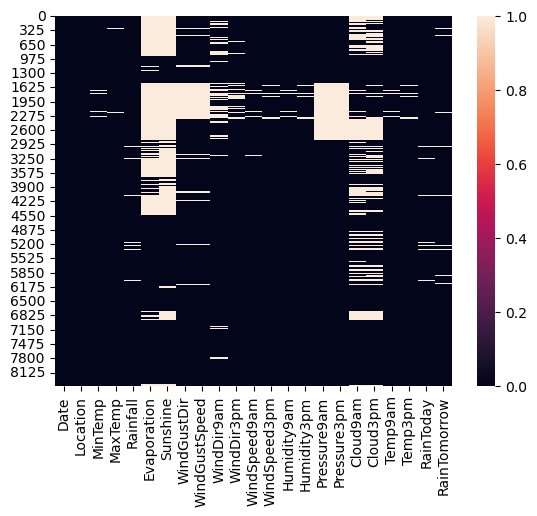

In [969]:
sns.heatmap(df.isnull())

From above heatmap, we can see there are null/missing values present in the dataset.
* Sunshine colummn containes 3994 null values followed by Evaporation column with 3512

In [970]:
# Seperating categorical and numerical features

In [971]:
num = [feature for feature in df.columns if df[feature].dtype != 'O']
cat = [feature for feature in df.columns if df[feature].dtype == 'O']

In [972]:
numerical=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']].copy()

In [973]:
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [974]:
cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

As null values are large in numbers, we can not replace thme with 0 as it will make our model biased and will not predict the result accurately. We can use imputing technic to replace the values with closet possible value.

In [975]:
# Calling iterative imputer method

In [976]:
from sklearn.experimental import enable_iterative_imputer

In [977]:
from sklearn.impute import IterativeImputer

**Our Target Variable is Rainfall and RainTomorrow**

In [978]:
df=df.dropna(subset=['Rainfall']) 

In [979]:
iter = IterativeImputer()

In [980]:
iterimp = pd.DataFrame(iter.fit_transform(df[['Rainfall','MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]), columns = ['Rainfall','MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'])

In [981]:
iterimp

,Rainfall,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.6,13.4,22.900000,5.137809,6.580611,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.171223,16.9,21.8
1,0.0,7.4,25.100000,6.000039,12.412480,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,1.039480,1.632026,17.2,24.3
2,0.0,12.9,25.700000,7.284111,11.772105,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,2.110778,2.000000,21.0,23.2
3,0.0,9.2,28.000000,5.393398,12.880993,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,0.448392,1.039231,18.1,26.5
4,1.0,17.5,32.300000,5.389607,6.370655,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,0.0,2.8,23.400000,4.124527,11.922682,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,0.661087,1.486286,10.1,22.4
8181,0.0,3.6,25.300000,3.803778,12.562014,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,0.519938,1.050539,10.9,24.5
8182,0.0,5.4,26.900000,5.723515,12.345127,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,0.754666,1.480901,12.5,26.1
8183,0.0,7.8,27.000000,5.882395,11.123465,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [982]:
# Checking for null values again

In [983]:
iterimp.isnull().sum()

Rainfall         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

We can see null values have been removed.

In [984]:
df.drop(columns=['Rainfall','MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],inplace=True)

In [985]:
df = pd.concat([df,iterimp],axis=1)
df

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,MinTemp,MaxTemp,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,W,W,WNW,No,No,0.6,13.4,22.9,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.171223,16.9,21.8
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,0.0,7.4,25.1,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.039480,1.632026,17.2,24.3
2,2008-12-03,Albury,WSW,W,WSW,No,No,0.0,12.9,25.7,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.110778,2.000000,21.0,23.2
3,2008-12-04,Albury,NE,SE,E,No,No,0.0,9.2,28.0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.448392,1.039231,18.1,26.5
4,2008-12-05,Albury,W,ENE,NW,No,No,1.0,17.5,32.3,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.4,17.1,...,7.0,15.0,67.0,50.0,1012.5,1009.0,5.516779,5.257288,14.0,16.8
6881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.8,16.4,...,7.0,11.0,77.0,43.0,1032.6,1029.2,1.000000,6.000000,9.0,15.9
6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4,13.6,20.2,...,11.0,31.0,91.0,80.0,1013.6,1011.4,7.000000,6.000000,16.8,18.6
6910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,12.0,17.3,...,19.0,20.0,70.0,87.0,1019.5,1019.4,3.000000,7.000000,13.7,14.0


In [986]:
# Checking for null values

In [987]:
df.isnull().sum()

Date              240
Location          240
WindGustDir      1207
WindDir9am       1039
WindDir3pm        530
RainToday         240
RainTomorrow      346
Rainfall          240
MinTemp           240
MaxTemp           240
Evaporation       240
Sunshine          240
WindGustSpeed     240
WindSpeed9am      240
WindSpeed3pm      240
Humidity9am       240
Humidity3pm       240
Pressure9am       240
Pressure3pm       240
Cloud9am          240
Cloud3pm          240
Temp9am           240
Temp3pm           240
dtype: int64

In [988]:
# Replacing categorical column null values with mode value of respective column

In [989]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [990]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [991]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [992]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [993]:
# Dropping null values

In [994]:
df = df.dropna()

In [995]:
df.isnull().sum()

Date             0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
Rainfall         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Now we can see all null values are gone from our dataset.

In [996]:
# Cehcking for duplicate values and dropping them

In [997]:
df.drop_duplicates(inplace=True)

Duplicate values are removed

In [998]:
# Checking statistical summary

In [999]:
df.describe()

,Rainfall,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000
mean,2.762985,13.075613,23.788896,5.005634,7.467610,39.062688,13.780128,18.354567,67.728573,51.220735,1017.935302,1015.462422,4.367241,4.326122,17.700556,22.366401
std,10.261708,5.422294,6.131865,4.370428,3.686430,14.793412,10.162537,9.703859,16.918444,18.476775,6.314413,6.227667,2.658754,2.524009,5.642299,5.967242
min,0.000000,-2.000000,8.200000,-3.600968,-1.536701,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,-1.855370,-2.705968,1.900000,7.300000
25%,0.000000,9.100000,19.200000,2.600000,4.700000,28.000000,6.000000,11.000000,56.000000,39.000000,1014.100000,1011.400000,2.000000,2.000000,13.600000,18.000000
50%,0.000000,13.200000,23.200000,4.442289,7.858642,37.000000,13.000000,19.000000,68.000000,51.000000,1018.200000,1015.700000,4.614250,4.326918,17.700000,21.800000
75%,1.000000,17.300000,28.000000,6.667934,10.300835,48.000000,20.000000,24.000000,80.000000,63.000000,1021.800000,1019.100000,7.000000,7.000000,21.900000,26.300000
max,371.000000,28.500000,45.500000,145.000000,18.203711,131.588550,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,9.827701,9.842535,39.400000,44.100000


We can see there are some outliers present in the dataset.
* There is huge difference between 75% and max values in Rainfall column followed by Evaporation column
* Windspeed9am showing minimum as 0 which is quiet odd and significant diffenrence between 75% and max values causing skewness

**4. Visualisation**

In [1000]:
numerical = df[['Rainfall', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']].copy()

In [1001]:
categorical=df[['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]

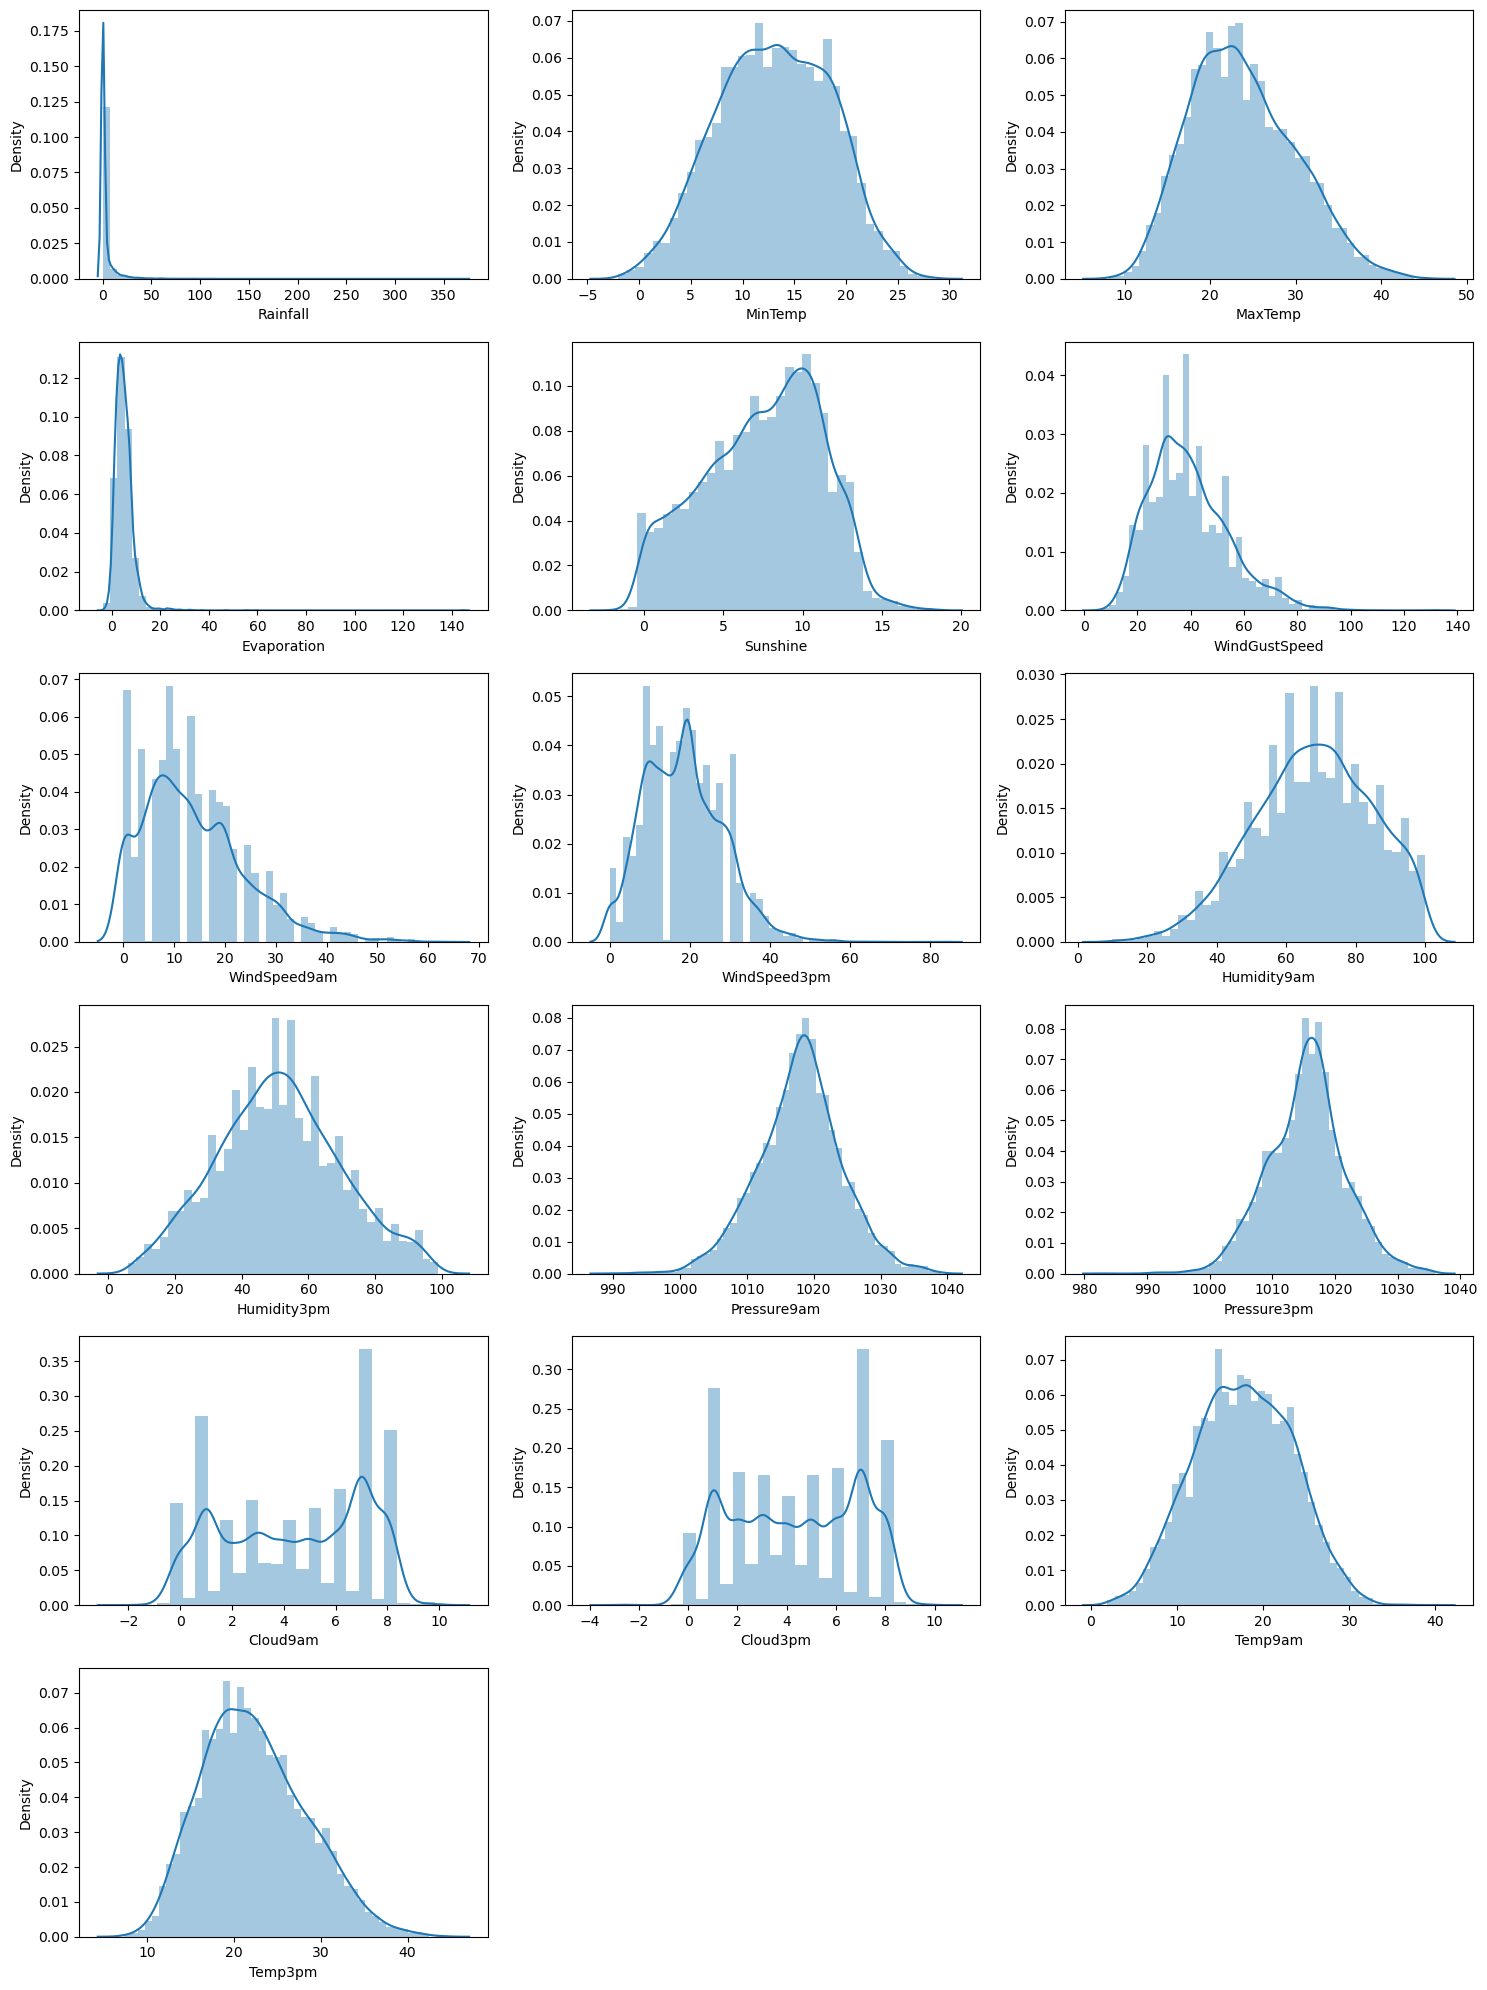

In [1002]:
plt.figure(figsize = (15,20))
plot = 1
for i in numerical:
    if plot <= 16:
        ax = plt.subplot(6,3, plot)
        sns.distplot(x = numerical[i])
        plt.xlabel(i)
    plot += 1
plt.tight_layout()

From above distplot, we can see most of the features are normally distributed.
* Rainfall, Evaporation are having some skewness present and we will need to treat it for our model to predict the result more accurately and precisely.

In [1003]:
from sklearn.preprocessing import LabelEncoder

In [1004]:
le = LabelEncoder()

In [1005]:
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [1006]:
# Analysing output variable RainTommorrow

<Axes: xlabel='RainTomorrow', ylabel='count'>

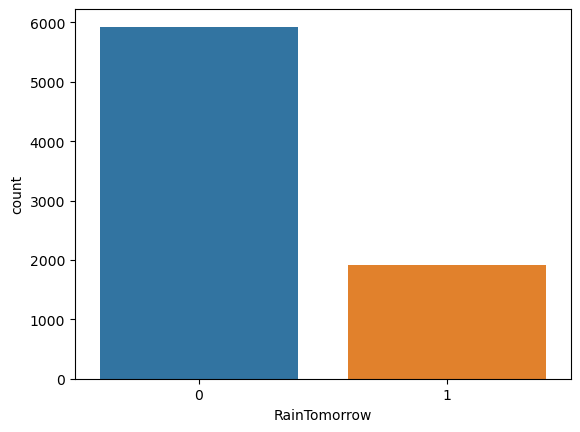

In [1007]:
sns.countplot(x='RainTomorrow', data = df)

<Axes: ylabel='RainTomorrow'>

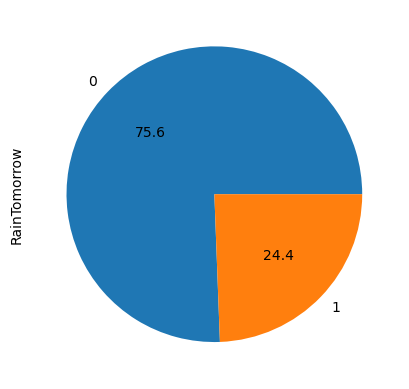

In [1008]:
df['RainTomorrow'].value_counts().plot.pie(autopct = '%2.1f')

From above, we can see there is data imbalance in our target variable.
* 75.6 % Data suggest no rain tomorrow
* Only 24.4% data suggets there is chance of raining tomorrow
* These imbalance dataset will make our model biased and will not predict the result accurately
* We will need to make our dataset balanced

In [1009]:
# Analysing categorical features
# Location Vs RainTomorrow

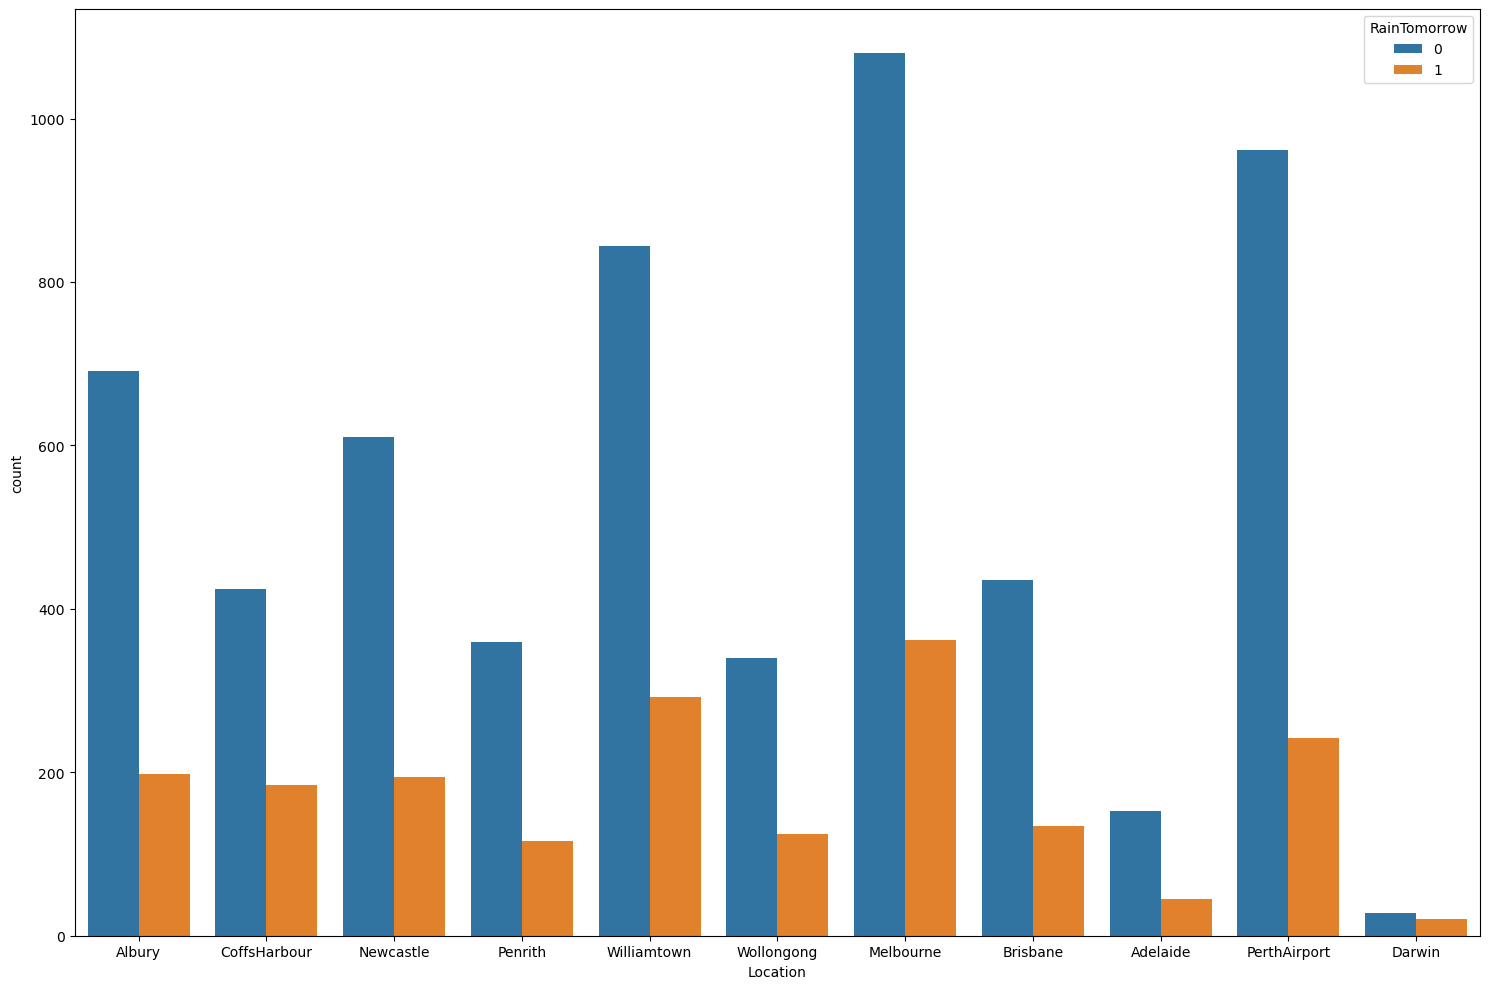

In [1010]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Location'], hue = df['RainTomorrow'])
plt.tight_layout()

In [1011]:
pd.crosstab([df.Location],[df.RainTomorrow,df.Rainfall])

RainTomorrow     0                                                        ...  \
Rainfall     0.0   0.1   0.2   0.4   0.5   0.6   0.7   0.8   1.0   1.2    ...   
Location                                                                  ...   
Adelaide       106     0     1     4     0     3     0     0     1     0  ...   
Albury         510     0    36    14     0    13     0     8     7     3  ...   
Brisbane       294     0    23    11     0     7     0     5     1     5  ...   
CoffsHarbour   264     0    11    13     0     6     0     5     3     3  ...   
Darwin          27     0     0     0     0     0     0     0     0     0  ...   
Melbourne      642     0    62    26     0    21     0    11     6    17  ...   
Newcastle      357    18    37    14     3     7     1     9    16     6  ...   
Penrith        211     0    44     7     0     5     0     2     3     9  ...   
PerthAirport   715     0    19    19     0     8     0     9    13     7  ...   
Williamtown    527     0    54    20     0    21     1    10     9     3  ...   
Wollongong     224     0     7     6     0     3     0     8     3     4  ...   

RainTomorrow     1                                                        
Rainfall     51.4  56.6  57.4  58.2  59.0  62.6  68.8  80.6  96.0  240.0  
Location                                                                  
Adelaide         0     0     0     0     0     0     0     0     0     0  
Albury           0     0     0     0     0     0     0     0     0     0  
Brisbane         0     0     0     0     0     0     0     0     0     0  
CoffsHarbour     0     1     0     0     1     1     0     1     1     0  
Darwin           0     0     0     0     0     0     0     0     0     0  
Melbourne        0     0     0     0     0     0     1     0     0     0  
Newcastle        1     0     0     0     0     0     0     0     0     1  
Penrith          0     0     0     0     0     0     0     0     0     0  
PerthAirport     0     0     0     0     0     0     0     0     0     0  
Williamtown      0     0     0     2     0     0     0     0     0     0  
Wollongong       0     0     2     0     0     0     0     0     0     0  

[11 rows x 380 columns]

From above we can see,
* Highest number of recording is made in Melbourne
* Melbourne has highest chance of rain tomorrow followed by Williamtown among other cities
* Darwin has lowest recording and more than 70% chance of rain tomorrow

In [1012]:
# WindGustDir Vs RainTomorrow

<Axes: xlabel='WindGustDir', ylabel='count'>

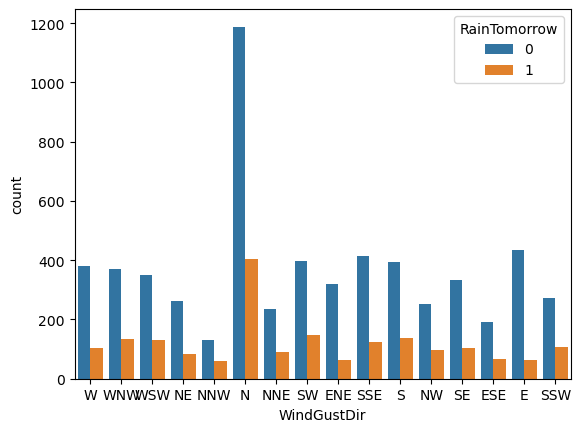

In [1013]:
sns.countplot(x = df['WindGustDir'], hue = df['RainTomorrow'])

<Axes: ylabel='WindGustDir'>

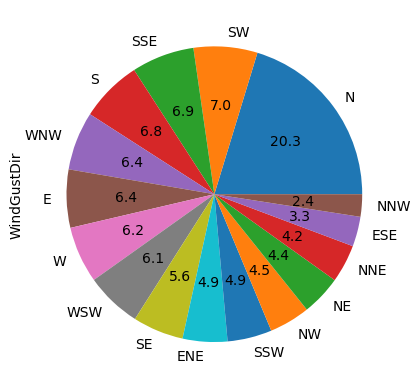

In [1014]:
df['WindGustDir'].value_counts().plot.pie(autopct = '%2.1f')

In [1015]:
pd.crosstab([df.WindGustDir],df['RainTomorrow']).T

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
0,435,319,191,1188,261,237,132,252,394,332,413,274,398,382,369,350
1,63,64,65,403,82,89,60,98,137,104,125,107,149,103,133,131


From above we can see,
* Highest direction of wind come from North
* North wind has maximum chance of getting rain tomorrow
* Lowest wind recorded from midway between and north and north west

In [1016]:
# WinDir9am Vs RainTomorrow

<Axes: xlabel='WindDir9am', ylabel='count'>

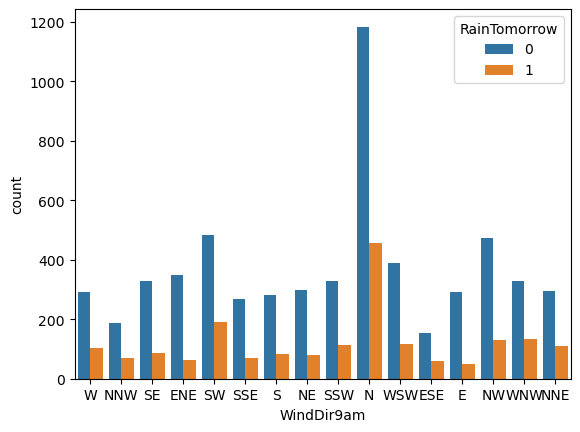

In [1017]:
sns.countplot(x = df['WindDir9am'], hue = df['RainTomorrow'])

<Axes: ylabel='WindDir9am'>

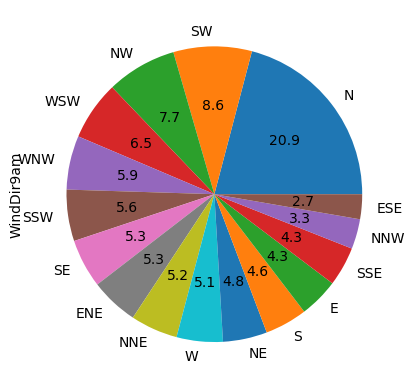

In [1018]:
df['WindDir9am'].value_counts().plot.pie(autopct = '%2.1f')

North wind has highest chance of raining tomorrow at 9am as per above charts.

In [1019]:
# WindDir3pm Vs RainTomorrow

<Axes: xlabel='WindDir3pm', ylabel='count'>

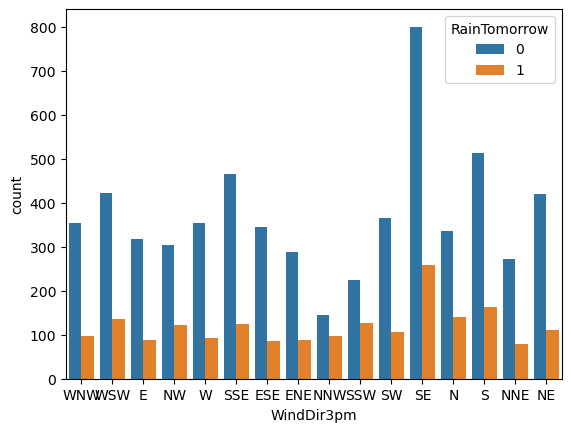

In [1020]:
sns.countplot(x = df['WindDir3pm'], hue = df['RainTomorrow'])

<Axes: ylabel='WindDir3pm'>

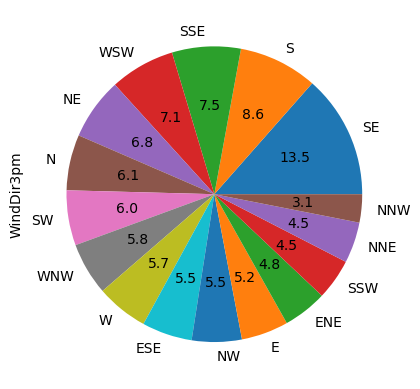

In [1021]:
df['WindDir3pm'].value_counts().plot.pie(autopct = '%2.1f')

In [1022]:
pd.crosstab([df.WindDir3pm],df['RainTomorrow']).T

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
0,317,289,345,336,420,271,145,305,514,800,465,225,366,353,355,421
1,87,88,86,141,110,80,97,123,162,258,124,126,106,93,96,136


From above we can see, south east wind dir has more chance of getting rain at 3pm.

In [1023]:
# RainToday Vs RainTomorrow

<Axes: xlabel='RainToday', ylabel='count'>

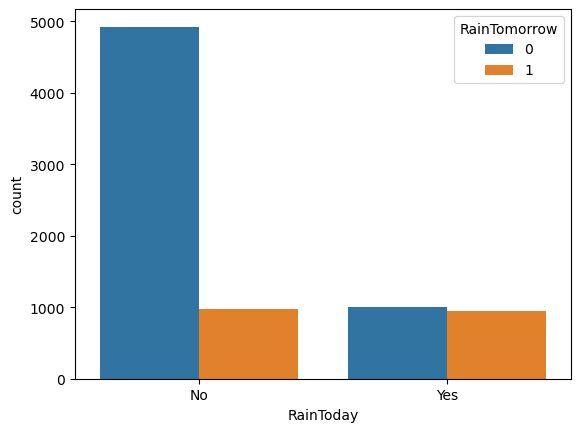

In [1024]:
sns.countplot(x = df['RainToday'], hue = df['RainTomorrow'])

<Axes: ylabel='RainToday'>

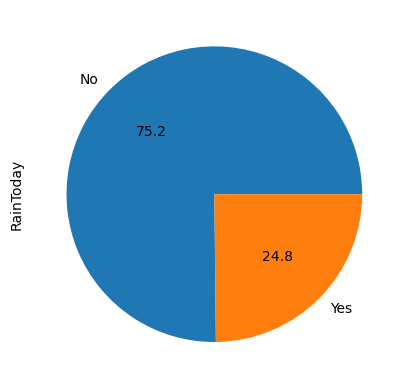

In [1025]:
df['RainToday'].value_counts().plot.pie(autopct = '%2.1f')

From above we can see chance or raining today and tomorrow
* There is less chance or raining today as compare to raining tomorrow 

In [1026]:
# Encoding categorical data into numerical data

In [1027]:
df["Date_month"] = pd.to_datetime(df["Date"], format = "%Y/%m/%d").dt.month # extracting the month

In [1028]:
df["Date_year"] = pd.to_datetime(df["Date"], format = "%Y/%m/%d").dt.year # extracting the year

In [1029]:
# Dropping Date column as we already made month and year column seperately

In [1030]:
df.drop(columns = ['Date'],inplace=True)

In [1031]:
df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,MinTemp,MaxTemp,Evaporation,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_month,Date_year
0,Albury,W,W,WNW,No,0,0.6,13.4,22.9,5.137809,...,71.0,22.0,1007.7,1007.1,8.000000,5.171223,16.9,21.8,12,2008
1,Albury,WNW,NNW,WSW,No,0,0.0,7.4,25.1,6.000039,...,44.0,25.0,1010.6,1007.8,1.039480,1.632026,17.2,24.3,12,2008
2,Albury,WSW,W,WSW,No,0,0.0,12.9,25.7,7.284111,...,38.0,30.0,1007.6,1008.7,2.110778,2.000000,21.0,23.2,12,2008
3,Albury,NE,SE,E,No,0,0.0,9.2,28.0,5.393398,...,45.0,16.0,1017.6,1012.8,0.448392,1.039231,18.1,26.5,12,2008
4,Albury,W,ENE,NW,No,0,1.0,17.5,32.3,5.389607,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,12,2008


In [1032]:
df.dtypes

Location          object
WindGustDir       object
WindDir9am        object
WindDir3pm        object
RainToday         object
RainTomorrow       int64
Rainfall         float64
MinTemp          float64
MaxTemp          float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
Date_month         int64
Date_year          int64
dtype: object

In [1033]:
# Converting categorical data into numerical form

In [1034]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [1035]:
df.dtypes

Location           int64
WindGustDir        int64
WindDir9am         int64
WindDir3pm         int64
RainToday          int64
RainTomorrow       int64
Rainfall         float64
MinTemp          float64
MaxTemp          float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
Date_month         int64
Date_year          int64
dtype: object

In [1036]:
# Splitting Dataset into x and y variables

In [1037]:
x = df.drop(['RainTomorrow'], axis=1)

In [1038]:
x.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Rainfall,MinTemp,MaxTemp,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_month,Date_year
0,1,13,13,14,0,0.6,13.4,22.9,5.137809,6.580611,...,71.0,22.0,1007.7,1007.1,8.000000,5.171223,16.9,21.8,12,2008
1,1,14,6,15,0,0.0,7.4,25.1,6.000039,12.412480,...,44.0,25.0,1010.6,1007.8,1.039480,1.632026,17.2,24.3,12,2008
2,1,15,13,15,0,0.0,12.9,25.7,7.284111,11.772105,...,38.0,30.0,1007.6,1008.7,2.110778,2.000000,21.0,23.2,12,2008
3,1,4,9,0,0,0.0,9.2,28.0,5.393398,12.880993,...,45.0,16.0,1017.6,1012.8,0.448392,1.039231,18.1,26.5,12,2008
4,1,13,1,7,0,1.0,17.5,32.3,5.389607,6.370655,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,12,2008


In [1039]:
y = df['RainTomorrow']
y

0       0
1       0
2       0
3       0
4       0
       ..
8180    0
8181    1
8182    0
8183    0
8184    1
Name: RainTomorrow, Length: 7840, dtype: int64

In [1040]:
# Checking for correlation

In [1041]:
df.corr()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,MinTemp,MaxTemp,Evaporation,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_month,Date_year
Location,1.000000,-0.054667,-0.057340,-0.014831,0.000687,-0.002003,-0.000549,0.155461,0.075000,0.157974,...,-0.004267,0.047486,-0.027026,-0.021248,0.083796,0.057068,0.140465,0.071792,-0.093052,0.464406
WindGustDir,-0.054667,1.000000,0.402131,0.501648,0.121482,0.043893,-0.027847,-0.033992,-0.025499,-0.002999,...,-0.033421,-0.039993,-0.028599,-0.017029,0.035122,0.014343,-0.039564,-0.022693,0.038348,-0.082412
WindDir9am,-0.057340,0.402131,1.000000,0.244964,0.159441,0.026139,0.004870,0.005888,-0.042624,0.014777,...,-0.003963,0.057506,0.009835,0.020403,0.038139,0.037348,-0.004241,-0.049606,0.017993,-0.014367
WindDir3pm,-0.014831,0.501648,0.244964,1.000000,0.094289,-0.000385,-0.023395,-0.038188,0.005964,-0.015542,...,-0.021605,-0.062343,-0.045632,-0.043390,0.004515,-0.006127,-0.032184,0.008020,0.039406,0.009891
RainToday,0.000687,0.121482,0.159441,0.094289,1.000000,0.320948,0.000934,0.010221,-0.014943,-0.017453,...,0.035851,0.038920,0.004563,0.005056,0.026657,0.033890,-0.004705,-0.013968,0.011411,-0.002333
RainTomorrow,-0.002003,0.043893,0.026139,-0.000385,0.320948,1.000000,0.002970,0.011443,-0.017265,-0.004369,...,0.028991,0.034429,-0.001547,0.001288,0.017686,0.016991,-0.005716,-0.015676,0.007152,-0.002687
Rainfall,-0.000549,-0.027847,0.004870,-0.023395,0.000934,0.002970,1.000000,0.088647,-0.089018,0.116174,...,0.230584,0.241047,-0.079034,-0.033508,0.209412,0.175389,-0.007504,-0.092458,0.018996,-0.006923
MinTemp,0.155461,-0.033992,0.005888,-0.038188,0.010221,0.011443,0.088647,1.000000,0.722205,0.440529,...,-0.142628,0.078791,-0.464204,-0.457658,0.126911,0.072515,0.889230,0.690384,0.023402,0.113906
MaxTemp,0.075000,-0.025499,-0.042624,0.005964,-0.014943,-0.017265,-0.089018,0.722205,1.000000,0.510552,...,-0.404371,-0.425270,-0.343305,-0.431309,-0.335462,-0.332594,0.870217,0.978248,0.042523,0.135455
Evaporation,0.157974,-0.002999,0.014777,-0.015542,-0.017453,-0.004369,0.116174,0.440529,0.510552,1.000000,...,-0.354843,-0.252785,-0.274738,-0.287566,-0.107186,-0.208730,0.504760,0.496325,0.017984,0.129521


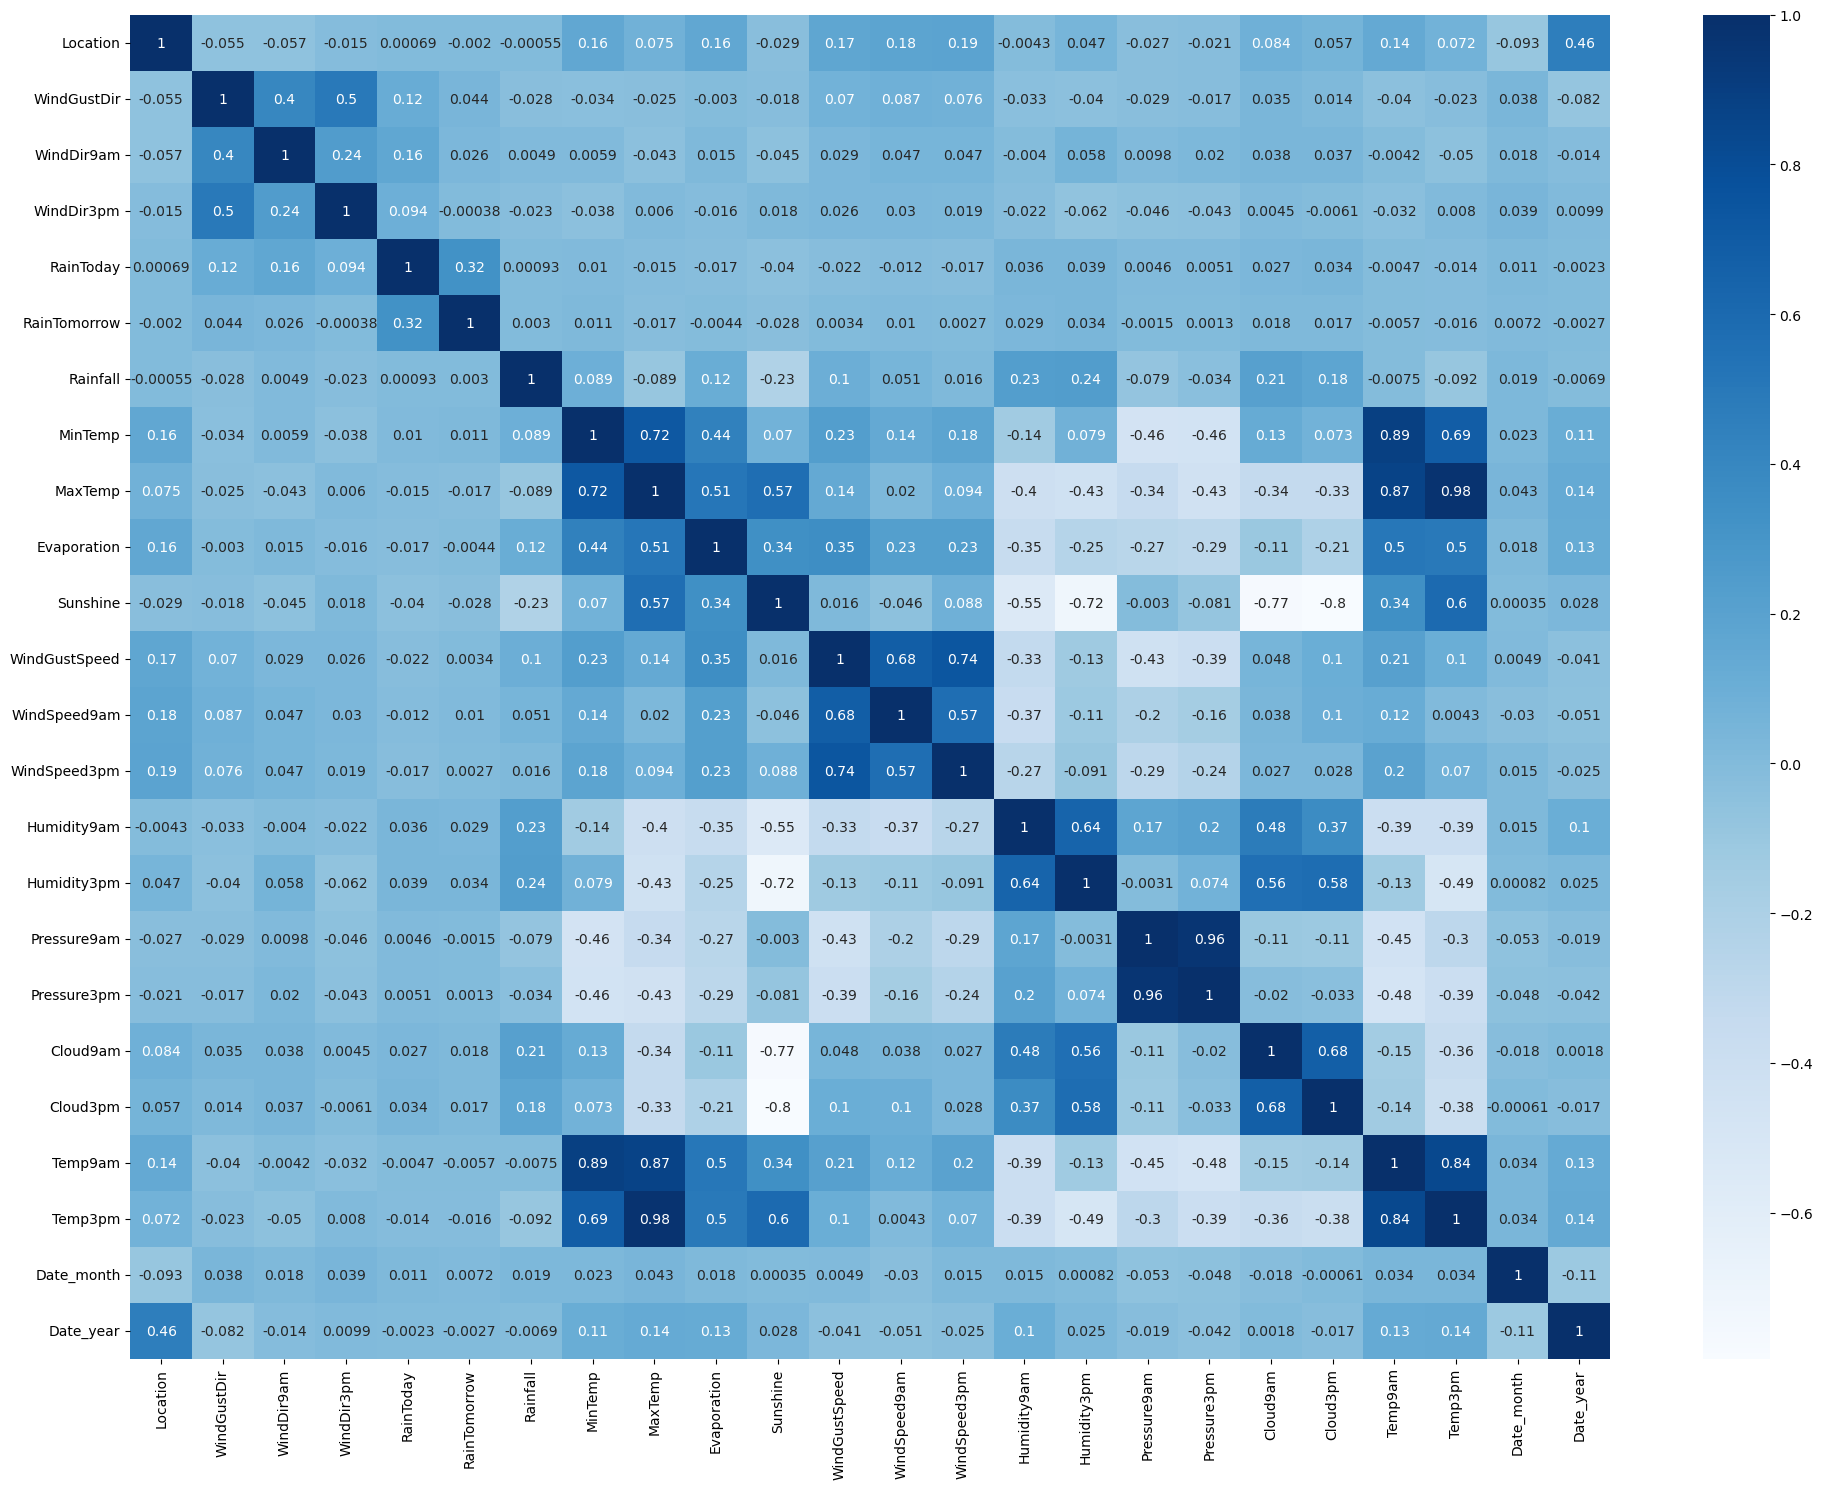

In [1042]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.tight_layout()

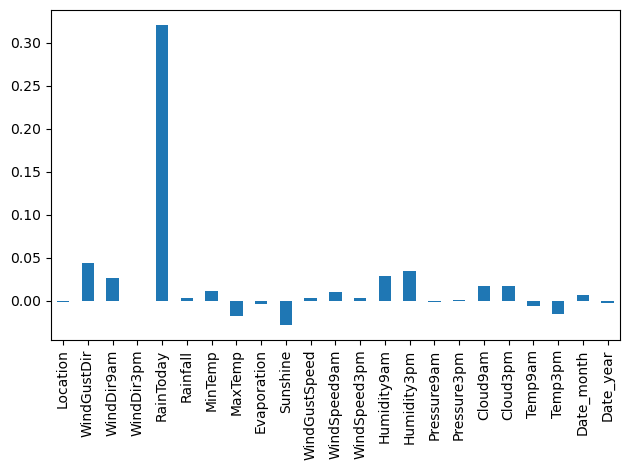

In [1043]:
df.drop('RainTomorrow', axis=1).corrwith(df.RainTomorrow).plot(kind='bar')
plt.tight_layout()

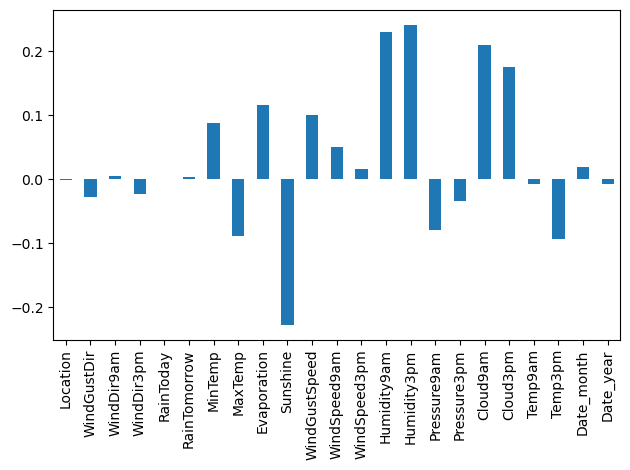

In [1044]:
df.drop('Rainfall', axis=1).corrwith(df.Rainfall).plot(kind='bar')
plt.tight_layout()

In [1045]:
# Detecting and removing outliers

In [1046]:
df.shape

(7840, 24)

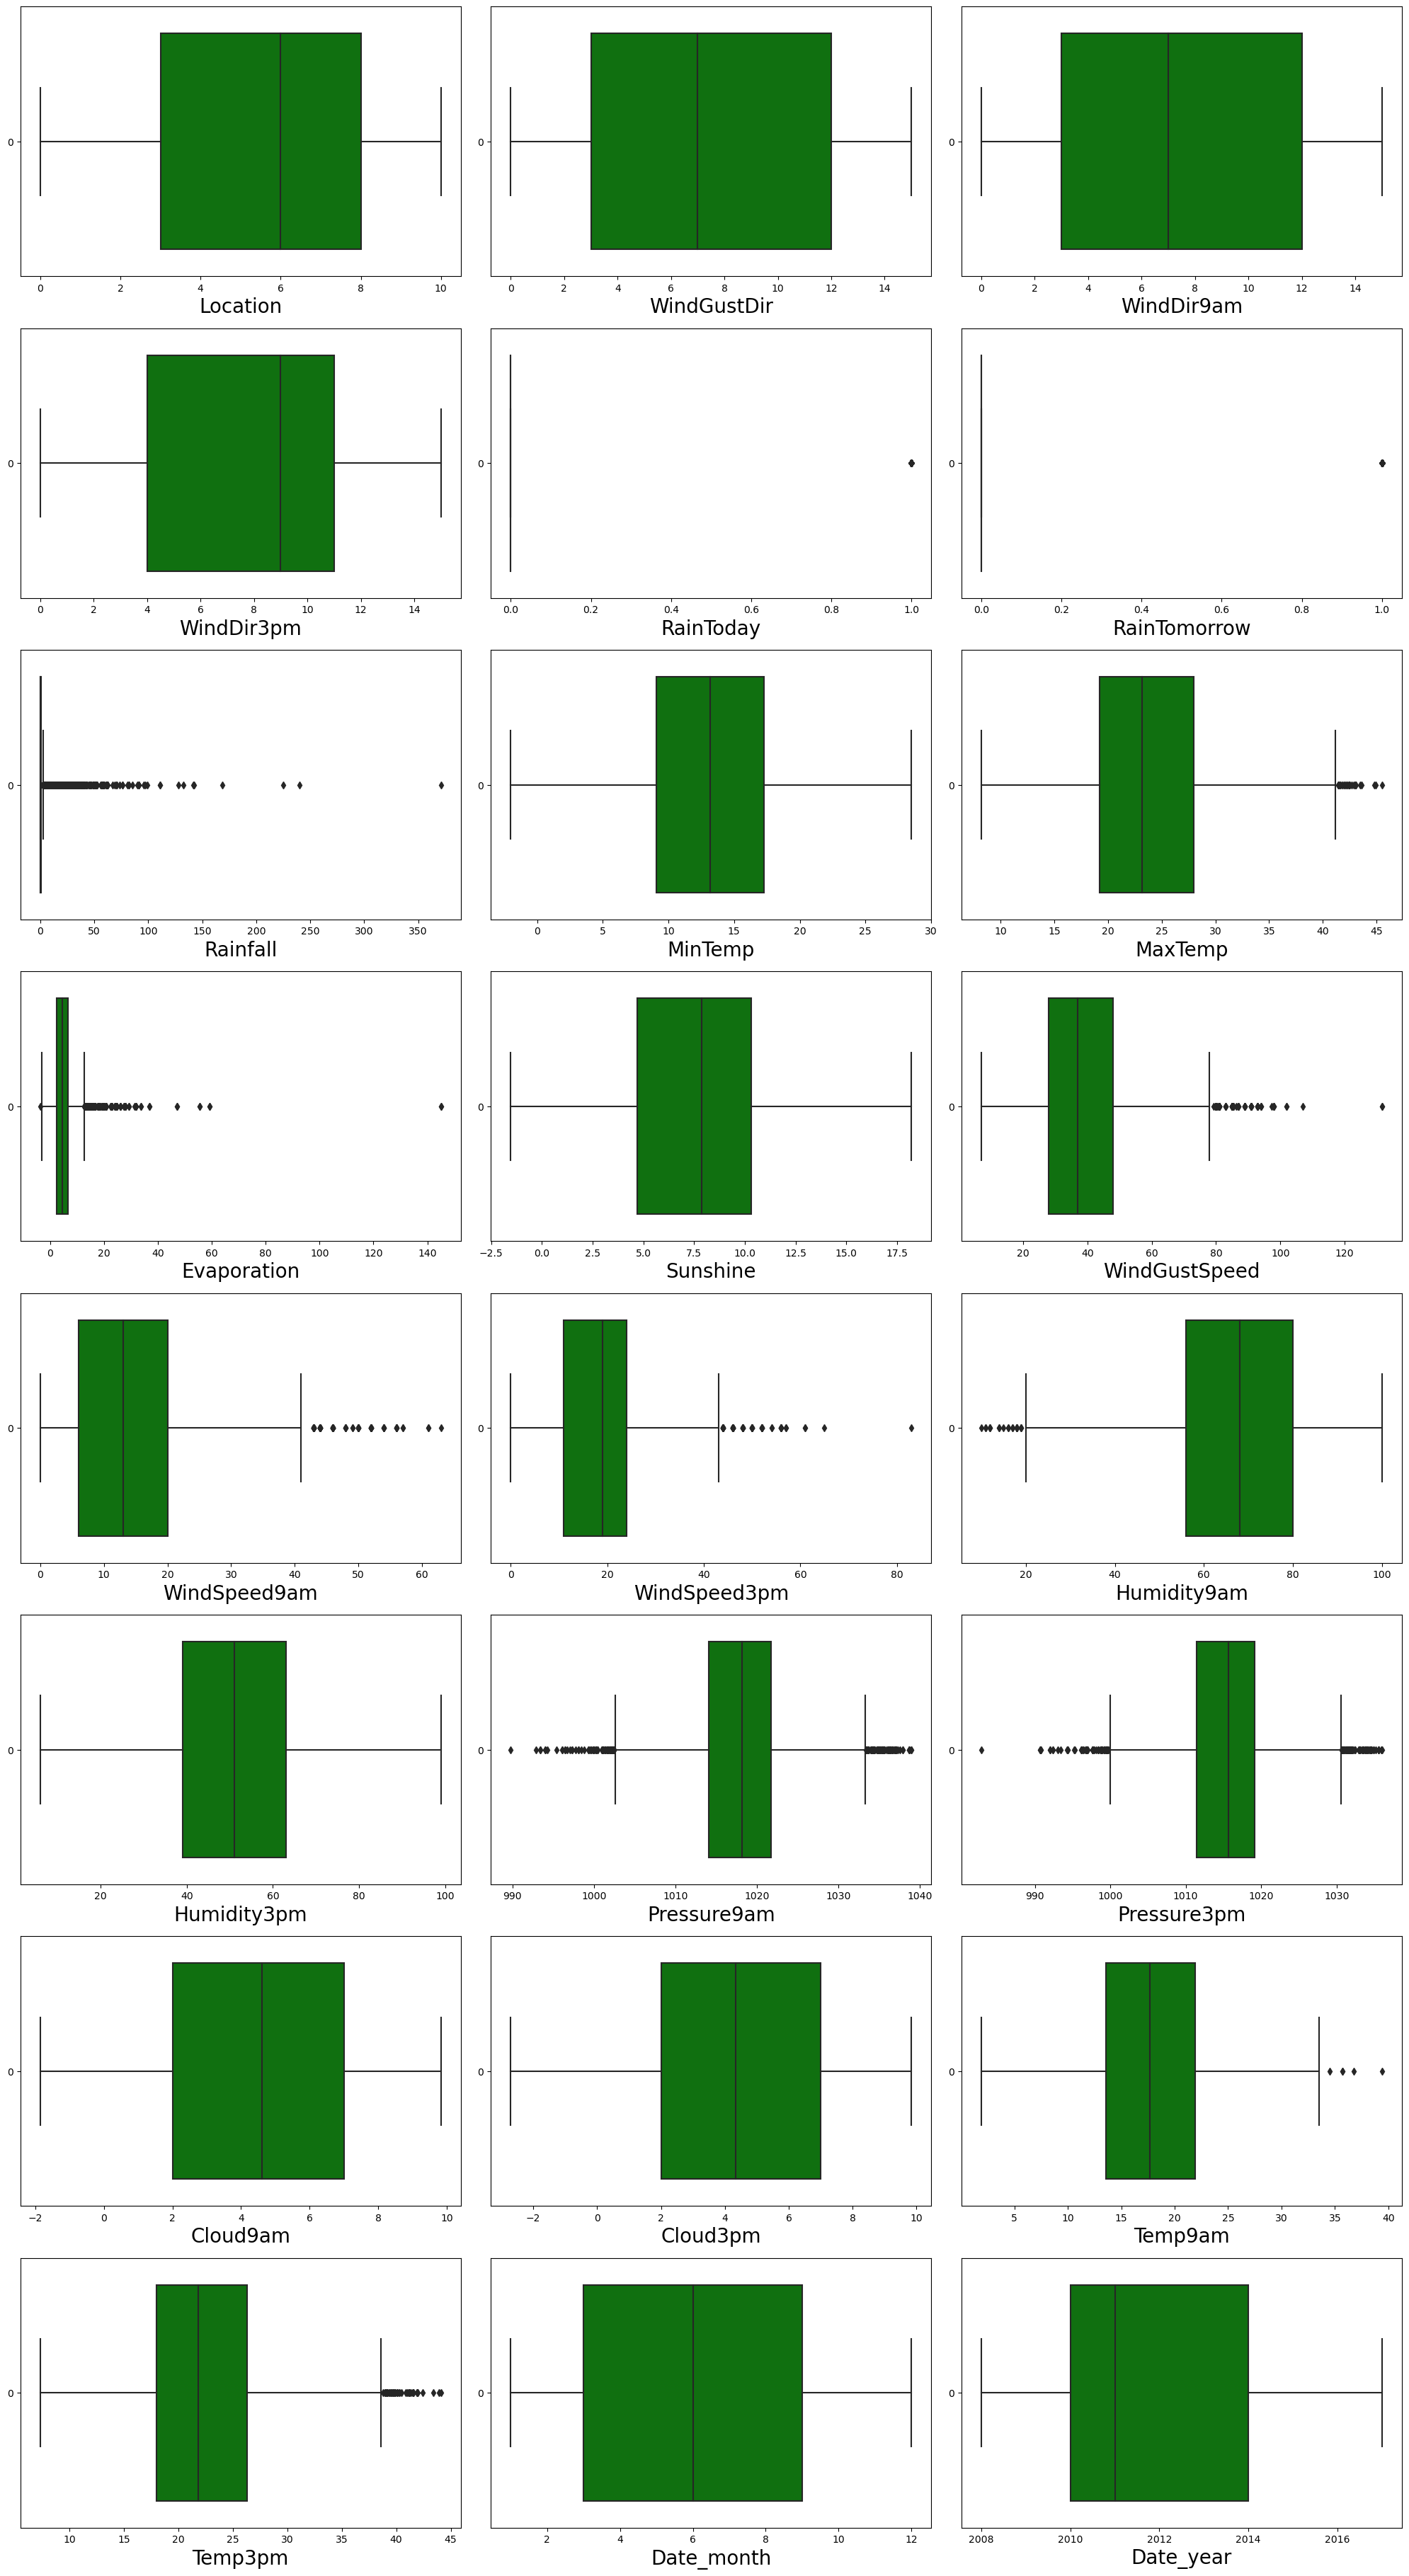

In [1047]:
plt.figure(figsize=(20,45),facecolor='white')
plot = 1

for column in df:
    if plot <= 24:
        ax = plt.subplot(10,3,plot)
        sns.boxplot(df[column],color='g', orient = 'h')
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.tight_layout()

We can see there are quiet a few outliers present in the dataset and we will need to remove it.

In [1048]:
from scipy.stats import zscore

In [1049]:
z = np.abs(zscore(df))
z

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,MinTemp,MaxTemp,Evaporation,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_month,Date_year
0,1.570753,1.213762,1.239898,1.382352,0.574797,0.568120,0.210796,0.059829,0.144973,0.030245,...,0.193377,1.581586,1.621046,1.342871,1.366426,0.334846,0.141894,0.094924,1.644113,1.631159
1,1.570753,1.426203,0.282273,1.608348,0.574797,0.568120,0.269269,1.046785,0.213832,0.227545,...,1.402616,1.419209,1.161750,1.230463,1.251704,1.067456,0.088721,0.324056,1.644113,1.631159
2,1.570753,1.638645,1.239898,1.608348,0.574797,0.568120,0.269269,0.032389,0.311688,0.521373,...,1.757282,1.148582,1.636884,1.085937,0.848746,0.921657,0.584807,0.139705,1.644113,1.631159
3,1.570753,0.698212,0.370086,1.781592,0.574797,0.568120,0.269269,0.714801,0.686801,0.088730,...,1.343506,1.906338,0.053104,0.427542,1.474035,1.302333,0.070799,0.692759,1.644113,1.631159
4,1.570753,1.213762,1.369537,0.199620,0.574797,0.568120,0.171813,0.816014,1.388101,0.087863,...,0.843596,0.986206,1.130075,1.519514,0.990286,1.455665,0.017626,1.229055,1.644113,1.631159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,0.546576,0.576437,0.370086,0.425616,0.574797,0.568120,0.269269,1.895188,0.063426,0.201620,...,0.988840,1.473335,1.055541,0.776838,1.394032,1.125201,1.347153,0.005631,0.684202,0.025296
8181,0.546576,1.547978,1.152085,1.781592,0.574797,1.760192,0.269269,1.747640,0.246450,0.275015,...,0.693286,1.635711,0.881326,0.584137,1.447124,1.297853,1.205358,0.357575,0.684202,0.025296
8182,0.546576,0.485770,1.369537,1.103604,1.739744,0.568120,0.269269,1.415656,0.507399,0.164269,...,0.870619,1.473335,0.485381,0.214794,1.358834,1.127334,0.921767,0.625722,0.684202,0.025296
8183,0.546576,1.335536,0.499726,0.651612,0.574797,0.568120,0.269269,0.973011,0.523708,0.200625,...,0.988840,1.473335,0.231976,0.166618,0.514274,0.921657,0.460933,0.608963,0.684202,0.025296


In [1050]:
threshold = 3
print(np.where(z>3))

(array([  12,   12,   41,   41,   49,   49,   57,   57,   58,   58,   59,
         59,   64,   64,   65,   65,  120,  264,  290,  375,  375,  399,
        399,  400,  400,  401,  401,  425,  539,  544,  544,  545,  656,
        656,  672,  686,  721,  721,  743,  769,  770,  775,  901,  907,
        919,  949,  950,  950,  950,  978,  979,  981, 1108, 1118, 1119,
       1119, 1121, 1159, 1172, 1173, 1207, 1211, 1234, 1235, 1327, 1381,
       1382, 1383, 1449, 1450, 1451, 1483, 1505, 1557, 1614, 1631, 1635,
       1643, 1650, 1744, 1782, 1828, 1853, 1853, 1858, 1900, 1971, 1983,
       1998, 2018, 2028, 2060, 2068, 2142, 2142, 2160, 2160, 2160, 2168,
       2169, 2203, 2367, 2423, 2440, 2461, 2461, 2473, 2525, 2608, 2609,
       2664, 2762, 2771, 2771, 2777, 2782, 2788, 2793, 2795, 2802, 2803,
       2809, 2810, 2812, 2812, 2813, 2817, 2821, 2823, 2831, 2845, 2851,
       2859, 2865, 2873, 2879, 2884, 2898, 2912, 2951, 2951, 2958, 2959,
       2959, 2960, 2966, 2967, 2967, 2967, 2968, 2

In [1051]:
df = df[(z<3).all(axis=1)]
df

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,MinTemp,MaxTemp,Evaporation,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_month,Date_year
0,1,13,13,14,0,0,0.6,13.4,22.900000,5.137809,...,71.0,22.0,1007.7,1007.1,8.000000,5.171223,16.9,21.8,12,2008
1,1,14,6,15,0,0,0.0,7.4,25.100000,6.000039,...,44.0,25.0,1010.6,1007.8,1.039480,1.632026,17.2,24.3,12,2008
2,1,15,13,15,0,0,0.0,12.9,25.700000,7.284111,...,38.0,30.0,1007.6,1008.7,2.110778,2.000000,21.0,23.2,12,2008
3,1,4,9,0,0,0,0.0,9.2,28.000000,5.393398,...,45.0,16.0,1017.6,1012.8,0.448392,1.039231,18.1,26.5,12,2008
4,1,13,1,7,0,0,1.0,17.5,32.300000,5.389607,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,4,10,9,6,0,0,0.0,2.8,23.400000,4.124527,...,51.0,24.0,1024.6,1020.3,0.661087,1.486286,10.1,22.4,4,2012
8181,4,0,2,0,0,1,0.0,3.6,25.300000,3.803778,...,56.0,21.0,1023.5,1019.1,0.519938,1.050539,10.9,24.5,4,2012
8182,4,5,1,3,1,0,0.0,5.4,26.900000,5.723515,...,53.0,24.0,1021.0,1016.8,0.754666,1.480901,12.5,26.1,4,2012
8183,4,1,5,5,0,0,0.0,7.8,27.000000,5.882395,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,4,2012


In [1052]:
# Addressing imbalance data using SMOTE

In [1053]:
df['RainTomorrow'].value_counts()

0    5627
1    1825
Name: RainTomorrow, dtype: int64

In [1054]:
from imblearn.over_sampling import SMOTE

In [1055]:
os = SMOTE()
x, y = os.fit_resample(x, y)

In [1056]:
y.value_counts()

0    5927
1    5927
Name: RainTomorrow, dtype: int64

In [1057]:
# Checking got Multicollinearity

In [1058]:
from sklearn.preprocessing import StandardScaler

In [1059]:
sc = StandardScaler()

In [1060]:
sc= StandardScaler()
xs = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [1061]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1062]:
vif = pd.DataFrame()
vif['Features'] = xs.columns
vif['VIF Factor'] = [variance_inflation_factor(xs,i)for i in range (xs.shape[1])]
vif        

,Features,VIF Factor
0,Location,1.448214
1,WindGustDir,1.502981
2,WindDir9am,1.259850
3,WindDir3pm,1.344110
4,RainToday,1.039524
5,Rainfall,1.209529
6,MinTemp,9.778976
7,MaxTemp,37.307232
8,Evaporation,1.727120
9,Sunshine,7.611874


We can see there is multicollinearity present in the dataset.

**5. Machine Learning Model building**

In [1063]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [1064]:
# Dividing dataset for training and testing

In [1065]:
x_train,x_test,y_train,y_test = train_test_split(xs,y,test_size = .30, random_state = 42)

In [1066]:
x_train.shape

(8297, 23)

In [1067]:
x_test.shape

(3557, 23)

In [1068]:
from sklearn.decomposition import PCA

In [1069]:
pca = PCA()

In [1070]:
xp = pca.fit_transform(xs)

In [1071]:
xpnew = PCA(n_components=15)
x_new = xpnew.fit_transform(xs)

In [1072]:
x=pd.DataFrame(x_new,columns=np.arange(15))

In [1073]:
# Selecting ML models

In [1074]:
lg = LogisticRegression()
gnb = GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()

In [1075]:
model = [lg,gnb,knc,dtc,svc,rfc,etc]

In [1076]:
def bmodel():
    for m in model:
        print(m,':')
        print('----------------------------------------------------------------------------')
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        score = cross_val_score(m,x,y,cv=5)
        
        print('accuracy score:', accuracy_score(y_test, pred))
        print('confusion Matrix:', confusion_matrix(y_test, pred),'\n')
        print('Classification Report:', classification_report(y_test, pred),'\n')
        print('Cross Validation Score:', score.mean())
        print('*****************************************************************************\n')

In [1077]:
bmodel()

LogisticRegression() :
----------------------------------------------------------------------------
accuracy score: 0.5687377003092494
confusion Matrix: [[1218  560]
 [ 974  805]] 

Classification Report:               precision    recall  f1-score   support

           0       0.56      0.69      0.61      1778
           1       0.59      0.45      0.51      1779

    accuracy                           0.57      3557
   macro avg       0.57      0.57      0.56      3557
weighted avg       0.57      0.57      0.56      3557
 

Cross Validation Score: 0.37287249055482297
*****************************************************************************

GaussianNB() :
----------------------------------------------------------------------------
accuracy score: 0.6013494517852123
confusion Matrix: [[ 896  882]
 [ 536 1243]] 

Classification Report:               precision    recall  f1-score   support

           0       0.63      0.50      0.56      1778
           1       0.58      0.70    

**Hyper Parameter Tuning**

In [1080]:
parameter = {  'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [1081]:
gc = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.608 total time=   0.0s
[CV 2/5; 1/168] START criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.601 total time=   0.0s
[CV 3/5; 1/168] START criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.607 total time=   0.0s
[CV 4/5; 1/168] START criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.635 total time=   0.0s
[CV 5/5; 1/168] START criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 5/5; 1/168] END criterion=gini, max_depth=5,

[CV 2/5; 10/168] END criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.622 total time=   0.0s
[CV 3/5; 10/168] START criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 10/168] END criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.625 total time=   0.0s
[CV 4/5; 10/168] START criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 4/5; 10/168] END criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.649 total time=   0.0s
[CV 5/5; 10/168] START criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 5/5; 10/168] END criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.602 total time=   0.0s
[CV 1/5; 11/168] START criterion=gini, max_depth=5, max_features=log2, n_estimators=25
[CV 1/5; 11/168] END criterion=gini, max_depth=5, max_features=log2, n_estimators=25;, score=0.614 total time=   0.0s
[CV 2/5; 11/168] START criterion=gini, max_depth=5, max_featur

[CV 5/5; 18/168] END criterion=gini, max_depth=10, max_features=auto, n_estimators=25;, score=0.723 total time=   0.1s
[CV 1/5; 19/168] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 1/5; 19/168] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.710 total time=   0.1s
[CV 2/5; 19/168] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 2/5; 19/168] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.717 total time=   0.1s
[CV 3/5; 19/168] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 3/5; 19/168] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.691 total time=   0.1s
[CV 4/5; 19/168] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 4/5; 19/168] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.725 total time=   0.1s
[CV 5/5; 19/168] START criterion=gini, max_depth=10, 

[CV 1/5; 27/168] END criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.714 total time=   0.2s
[CV 2/5; 27/168] START criterion=gini, max_depth=10, max_features=log2, n_estimators=60
[CV 2/5; 27/168] END criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.723 total time=   0.2s
[CV 3/5; 27/168] START criterion=gini, max_depth=10, max_features=log2, n_estimators=60
[CV 3/5; 27/168] END criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.703 total time=   0.1s
[CV 4/5; 27/168] START criterion=gini, max_depth=10, max_features=log2, n_estimators=60
[CV 4/5; 27/168] END criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.729 total time=   0.1s
[CV 5/5; 27/168] START criterion=gini, max_depth=10, max_features=log2, n_estimators=60
[CV 5/5; 27/168] END criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.739 total time=   0.2s
[CV 1/5; 28/168] START criterion=gini, max_depth=10, 

[CV 1/5; 35/168] END criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=0.808 total time=   0.3s
[CV 2/5; 35/168] START criterion=gini, max_depth=20, max_features=auto, n_estimators=70
[CV 2/5; 35/168] END criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=0.814 total time=   0.3s
[CV 3/5; 35/168] START criterion=gini, max_depth=20, max_features=auto, n_estimators=70
[CV 3/5; 35/168] END criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=0.800 total time=   0.3s
[CV 4/5; 35/168] START criterion=gini, max_depth=20, max_features=auto, n_estimators=70
[CV 4/5; 35/168] END criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=0.811 total time=   0.3s
[CV 5/5; 35/168] START criterion=gini, max_depth=20, max_features=auto, n_estimators=70
[CV 5/5; 35/168] END criterion=gini, max_depth=20, max_features=auto, n_estimators=70;, score=0.811 total time=   0.3s
[CV 1/5; 36/168] START criterion=gini, max_depth=20, 

[CV 2/5; 44/168] END criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.779 total time=   0.1s
[CV 3/5; 44/168] START criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 3/5; 44/168] END criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.756 total time=   0.1s
[CV 4/5; 44/168] START criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 4/5; 44/168] END criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.778 total time=   0.1s
[CV 5/5; 44/168] START criterion=gini, max_depth=40, max_features=auto, n_estimators=10
[CV 5/5; 44/168] END criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.764 total time=   0.1s
[CV 1/5; 45/168] START criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 1/5; 45/168] END criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.776 total time=   0.1s
[CV 2/5; 45/168] START criterion=gini, max_depth=40, 

[CV 4/5; 52/168] END criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.792 total time=   0.1s
[CV 5/5; 52/168] START criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 5/5; 52/168] END criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.799 total time=   0.1s
[CV 1/5; 53/168] START criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 1/5; 53/168] END criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.800 total time=   0.1s
[CV 2/5; 53/168] START criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 2/5; 53/168] END criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.802 total time=   0.1s
[CV 3/5; 53/168] START criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 53/168] END criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.799 total time=   0.1s
[CV 4/5; 53/168] START criterion=gini, max_depth=40, 

[CV 5/5; 60/168] END criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.795 total time=   0.1s
[CV 1/5; 61/168] START criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 1/5; 61/168] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.810 total time=   0.2s
[CV 2/5; 61/168] START criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 2/5; 61/168] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.814 total time=   0.3s
[CV 3/5; 61/168] START criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 3/5; 61/168] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.814 total time=   0.3s
[CV 4/5; 61/168] START criterion=gini, max_depth=50, max_features=auto, n_estimators=50
[CV 4/5; 61/168] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.826 total time=   0.3s
[CV 5/5; 61/168] START criterion=gini, max_depth=50, 

[CV 5/5; 68/168] END criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.823 total time=   0.3s
[CV 1/5; 69/168] START criterion=gini, max_depth=50, max_features=log2, n_estimators=60
[CV 1/5; 69/168] END criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.808 total time=   0.3s
[CV 2/5; 69/168] START criterion=gini, max_depth=50, max_features=log2, n_estimators=60
[CV 2/5; 69/168] END criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.805 total time=   0.3s
[CV 3/5; 69/168] START criterion=gini, max_depth=50, max_features=log2, n_estimators=60
[CV 3/5; 69/168] END criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.819 total time=   0.4s
[CV 4/5; 69/168] START criterion=gini, max_depth=50, max_features=log2, n_estimators=60
[CV 4/5; 69/168] END criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.833 total time=   0.3s
[CV 5/5; 69/168] START criterion=gini, max_depth=50, 

[CV 5/5; 76/168] END criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.822 total time=   0.3s
[CV 1/5; 77/168] START criterion=gini, max_depth=60, max_features=auto, n_estimators=70
[CV 1/5; 77/168] END criterion=gini, max_depth=60, max_features=auto, n_estimators=70;, score=0.812 total time=   0.4s
[CV 2/5; 77/168] START criterion=gini, max_depth=60, max_features=auto, n_estimators=70
[CV 2/5; 77/168] END criterion=gini, max_depth=60, max_features=auto, n_estimators=70;, score=0.828 total time=   0.4s
[CV 3/5; 77/168] START criterion=gini, max_depth=60, max_features=auto, n_estimators=70
[CV 3/5; 77/168] END criterion=gini, max_depth=60, max_features=auto, n_estimators=70;, score=0.821 total time=   0.4s
[CV 4/5; 77/168] START criterion=gini, max_depth=60, max_features=auto, n_estimators=70
[CV 4/5; 77/168] END criterion=gini, max_depth=60, max_features=auto, n_estimators=70;, score=0.829 total time=   0.4s
[CV 5/5; 77/168] START criterion=gini, max_depth=60, 

[CV 5/5; 84/168] END criterion=gini, max_depth=60, max_features=log2, n_estimators=70;, score=0.823 total time=   0.4s
[CV 1/5; 85/168] START criterion=entropy, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 85/168] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.607 total time=   0.0s
[CV 2/5; 85/168] START criterion=entropy, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 85/168] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.603 total time=   0.0s
[CV 3/5; 85/168] START criterion=entropy, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 85/168] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.617 total time=   0.0s
[CV 4/5; 85/168] START criterion=entropy, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 85/168] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=5;, score=0.619 total time=   0.0s
[CV 5/5; 85/168] START criterion=entropy, max

[CV 4/5; 93/168] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.658 total time=   0.0s
[CV 5/5; 93/168] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 93/168] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.639 total time=   0.0s
[CV 1/5; 94/168] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 1/5; 94/168] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.614 total time=   0.0s
[CV 2/5; 94/168] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 94/168] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.628 total time=   0.0s
[CV 3/5; 94/168] START criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 94/168] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.612 total time=   0.0s
[CV 4/5; 94/168] START criterion=en

[CV 3/5; 101/168] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.688 total time=   0.0s
[CV 4/5; 101/168] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 101/168] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.719 total time=   0.0s
[CV 5/5; 101/168] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 101/168] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=15;, score=0.705 total time=   0.0s
[CV 1/5; 102/168] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 1/5; 102/168] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.707 total time=   0.1s
[CV 2/5; 102/168] START criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 2/5; 102/168] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.695 total time=   0.1s
[CV 3/5; 102/168]

[CV 5/5; 109/168] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.731 total time=   0.1s
[CV 1/5; 110/168] START criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 1/5; 110/168] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.719 total time=   0.1s
[CV 2/5; 110/168] START criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 2/5; 110/168] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.711 total time=   0.1s
[CV 3/5; 110/168] START criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 3/5; 110/168] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.694 total time=   0.1s
[CV 4/5; 110/168] START criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 4/5; 110/168] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.728 total time=   0.1s
[CV 5/5; 110/168]

[CV 4/5; 117/168] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.810 total time=   0.3s
[CV 5/5; 117/168] START criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 5/5; 117/168] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.798 total time=   0.3s
[CV 1/5; 118/168] START criterion=entropy, max_depth=20, max_features=auto, n_estimators=60
[CV 1/5; 118/168] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=0.788 total time=   0.3s
[CV 2/5; 118/168] START criterion=entropy, max_depth=20, max_features=auto, n_estimators=60
[CV 2/5; 118/168] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=0.805 total time=   0.3s
[CV 3/5; 118/168] START criterion=entropy, max_depth=20, max_features=auto, n_estimators=60
[CV 3/5; 118/168] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=0.801 total time=   0.3s
[CV 4/5; 118/168]

[CV 3/5; 125/168] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=0.796 total time=   0.3s
[CV 4/5; 125/168] START criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 4/5; 125/168] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=0.811 total time=   0.3s
[CV 5/5; 125/168] START criterion=entropy, max_depth=20, max_features=log2, n_estimators=60
[CV 5/5; 125/168] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=60;, score=0.811 total time=   0.3s
[CV 1/5; 126/168] START criterion=entropy, max_depth=20, max_features=log2, n_estimators=70
[CV 1/5; 126/168] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=70;, score=0.810 total time=   0.3s
[CV 2/5; 126/168] START criterion=entropy, max_depth=20, max_features=log2, n_estimators=70
[CV 2/5; 126/168] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=70;, score=0.808 total time=   0.4s
[CV 3/5; 126/168]

[CV 2/5; 133/168] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.828 total time=   0.4s
[CV 3/5; 133/168] START criterion=entropy, max_depth=40, max_features=auto, n_estimators=70
[CV 3/5; 133/168] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.810 total time=   0.4s
[CV 4/5; 133/168] START criterion=entropy, max_depth=40, max_features=auto, n_estimators=70
[CV 4/5; 133/168] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.833 total time=   0.4s
[CV 5/5; 133/168] START criterion=entropy, max_depth=40, max_features=auto, n_estimators=70
[CV 5/5; 133/168] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.829 total time=   0.4s
[CV 1/5; 134/168] START criterion=entropy, max_depth=40, max_features=log2, n_estimators=5
[CV 1/5; 134/168] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.735 total time=   0.0s
[CV 2/5; 134/168] S

[CV 1/5; 142/168] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.773 total time=   0.1s
[CV 2/5; 142/168] START criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 2/5; 142/168] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.772 total time=   0.1s
[CV 3/5; 142/168] START criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 3/5; 142/168] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.757 total time=   0.1s
[CV 4/5; 142/168] START criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 4/5; 142/168] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.788 total time=   0.1s
[CV 5/5; 142/168] START criterion=entropy, max_depth=50, max_features=auto, n_estimators=10
[CV 5/5; 142/168] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=10;, score=0.767 total time=   0.1s
[CV 1/5; 143/168]

[CV 5/5; 149/168] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.786 total time=   0.1s
[CV 1/5; 150/168] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 150/168] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.787 total time=   0.1s
[CV 2/5; 150/168] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 150/168] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.784 total time=   0.1s
[CV 3/5; 150/168] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 3/5; 150/168] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.792 total time=   0.1s
[CV 4/5; 150/168] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 4/5; 150/168] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.785 total time=   0.1s
[CV 5/5; 150/168]

[CV 1/5; 158/168] END criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.789 total time=   0.1s
[CV 2/5; 158/168] START criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 2/5; 158/168] END criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.807 total time=   0.1s
[CV 3/5; 158/168] START criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 158/168] END criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.802 total time=   0.1s
[CV 4/5; 158/168] START criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 158/168] END criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.811 total time=   0.1s
[CV 5/5; 158/168] START criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 158/168] END criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.807 total time=   0.1s
[CV 1/5; 159/168]

[CV 5/5; 165/168] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.800 total time=   0.1s
[CV 1/5; 166/168] START criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 166/168] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.810 total time=   0.3s
[CV 2/5; 166/168] START criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 2/5; 166/168] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.810 total time=   0.3s
[CV 3/5; 166/168] START criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 3/5; 166/168] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.816 total time=   0.3s
[CV 4/5; 166/168] START criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 4/5; 166/168] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.816 total time=   0.3s
[CV 5/5; 166/168]

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [1083]:
gc.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 70}

In [ ]:
# Selecting final model for prediction

In [1085]:
finmod = ExtraTreesClassifier(criterion='gini',n_estimators= 70, max_depth=60 ,max_features='auto')
finmod.fit(x_train,y_train)
pred=finmod.predict(x_test)
score = cross_val_score(finmod,x,y,cv=5)

print('Accuracy Score :', accuracy_score(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))
print('Clasification Report:', classification_report(y_test, pred))

print('Cross Validation Score:', score.mean())

Accuracy Score : 0.8445319089120045
Confusion Matrix: [[1479  299]
 [ 254 1525]]
Clasification Report:               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1778
           1       0.84      0.86      0.85      1779

    accuracy                           0.84      3557
   macro avg       0.84      0.84      0.84      3557
weighted avg       0.84      0.84      0.84      3557

Cross Validation Score: 0.5607397046235543


**AUC - ROC Curve**

In [1086]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

0.8445283399440162


Text(0, 0.5, 'TPR')

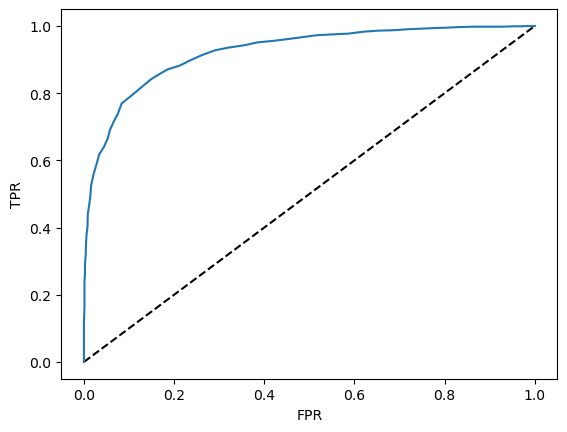

In [1087]:
auc_score = roc_auc_score(y_test, finmod.predict(x_test))
print(auc_score)

prob = finmod.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Extra Tree Classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')